<a href="https://colab.research.google.com/github/shubhang1206/Data-Science-101-LU/blob/main/EDA_Project_1_Analysis_of_AMCAT_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

df = pd.read_csv('/content/drive/MyDrive/AMCAT data.csv')
df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000.0,10/1/11 0:00,10/1/12 0:00,software engineer,New Delhi,m,4/15/87 0:00,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000.0,7/1/13 0:00,7/1/13 0:00,technical writer,Hyderabad,f,8/27/92 0:00,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000.0,7/1/13 0:00,present,associate software engineer,Bangalore,m,7/3/91 0:00,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000.0,7/1/14 0:00,1/1/15 0:00,software developer,Asifabadbanglore,f,3/20/92 0:00,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [4]:
df.shape

(3998, 39)

In [5]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [6]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [7]:
df.shape

(3998, 38)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

**EXPLORATORY DATA ANALYSIS**

In [9]:
df.isna().sum()

,0
ID,0
Salary,0
DOJ,0
DOL,0
Designation,0
JobCity,0
Gender,0
DOB,0
10percentage,0
10board,0


In [11]:
print("Numerical Columns:")
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
print(numerical_cols.columns)
print(numerical_cols.shape)

Numerical Columns:
Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')
(3998, 27)


In [12]:
print("Categorical Columns:")
categorical_cols = df.select_dtypes(include=['object'])
print(categorical_cols.columns)
print(categorical_cols.shape)

Categorical Columns:
Index(['Unnamed: 0', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10board', '12board', 'Degree', 'Specialization', 'CollegeState'],
      dtype='object')
(3998, 12)


In [13]:
df.duplicated().sum()

0

In [15]:
pd.DataFrame(df["Salary"].describe())

,Salary
count,3.998000e+03
mean,3.076998e+05
std,2.127375e+05
min,3.500000e+04
25%,1.800000e+05
50%,3.000000e+05
75%,3.700000e+05
max,4.000000e+06


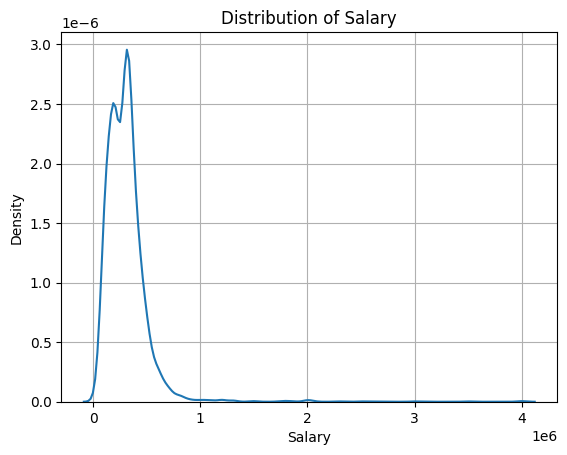

In [16]:
sns.kdeplot(data=df["Salary"])
plt.grid()
plt.title("Distribution of Salary")
plt.show()

**Insights**
*   In between 0 to 100000 the salaries are more compared to other salaries.
*   After 300000 there are less salries.






In [17]:
df["collegeGPA"].mean()

71.48617058529265

In [19]:
pd.DataFrame(df["JobCity"].value_counts())

,count
JobCity,
Bangalore,627
-1,461
Noida,368
Hyderabad,335
Pune,290
...,...
Tirunelvelli,1
Ernakulam,1
Nanded,1


In [18]:
df["Specialization"].value_counts().head(10)

,count
Specialization,
electronics and communication engineering,880
computer science & engineering,744
information technology,660
computer engineering,600
computer application,244
mechanical engineering,201
electronics and electrical engineering,196
electronics & telecommunications,121
electrical engineering,82


In [24]:
d=pd.DataFrame(df["Specialization"].value_counts().head(10))
d

,count
Specialization,
electronics and communication engineering,880
computer science & engineering,744
information technology,660
computer engineering,600
computer application,244
mechanical engineering,201
electronics and electrical engineering,196
electronics & telecommunications,121
electrical engineering,82


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

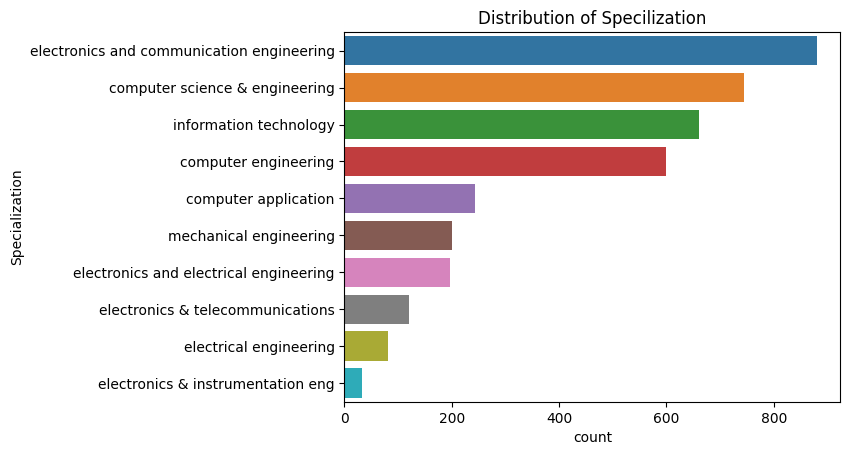

In [25]:
sns.barplot(y=d.index,x=d["count"],hue=d.index)
plt.title("Distribution of Specilization")
plt.show()

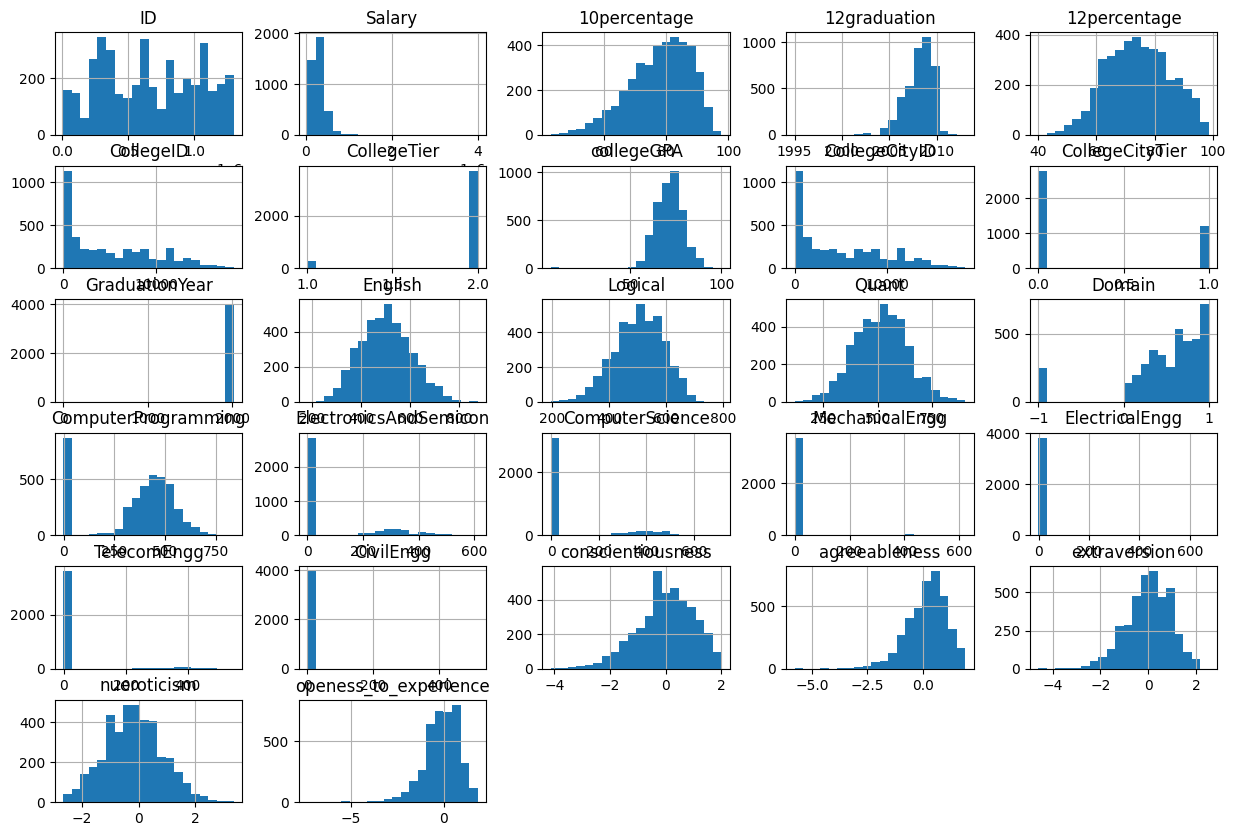

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

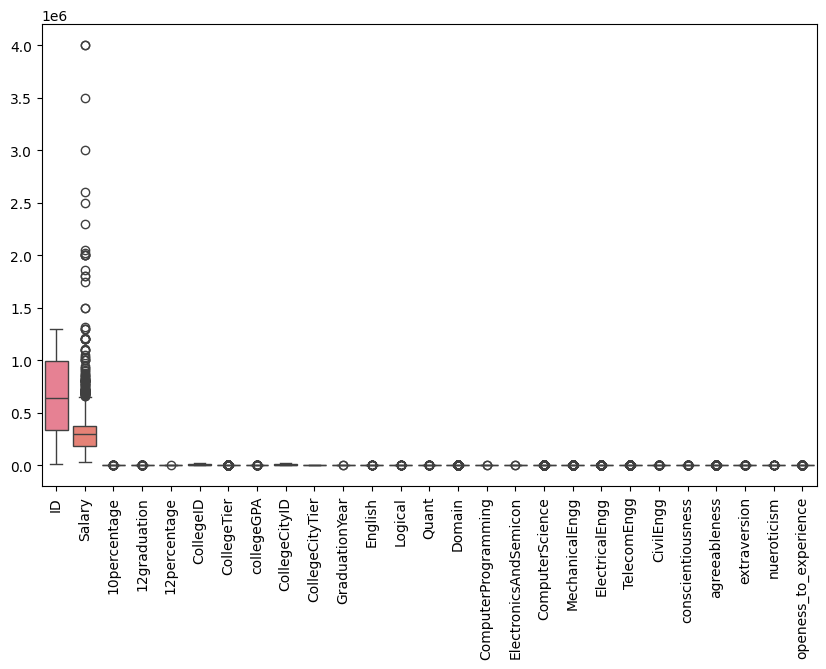

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


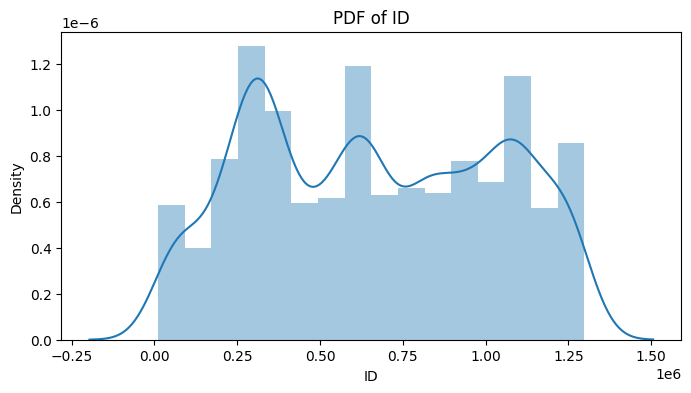

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


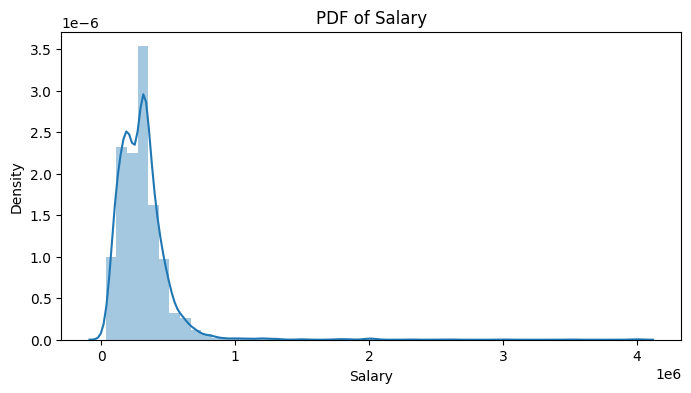

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


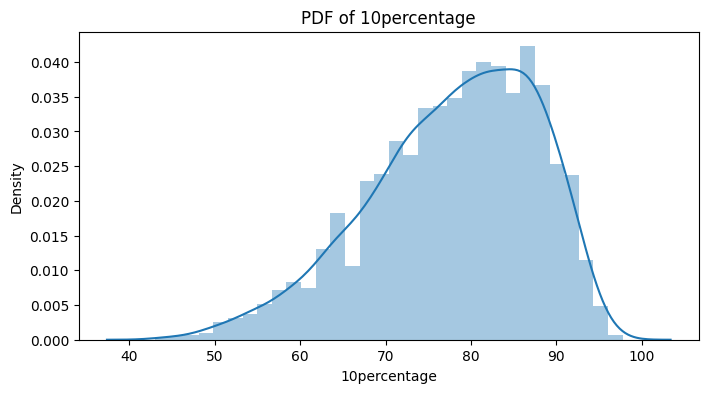

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


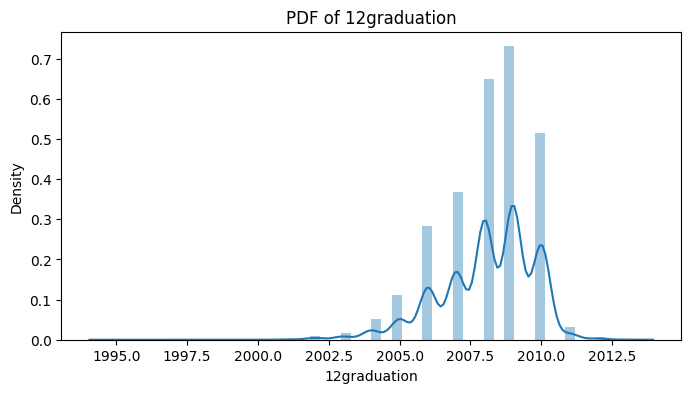

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


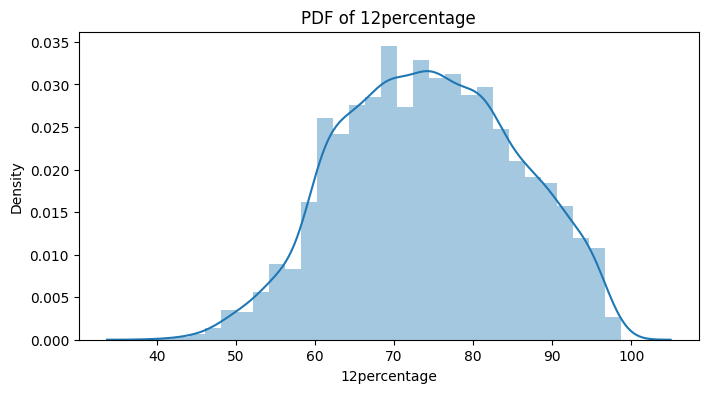

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


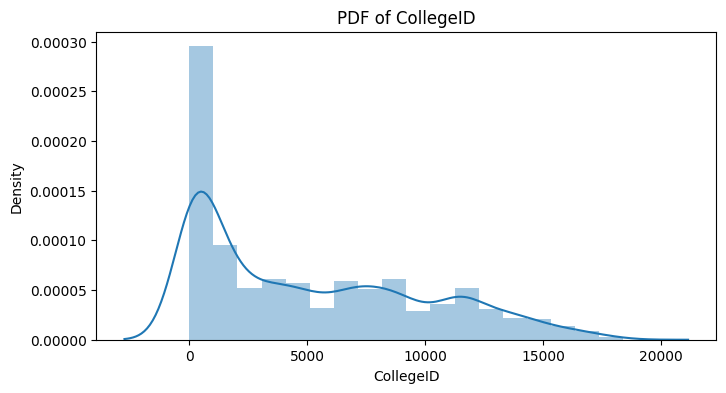

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


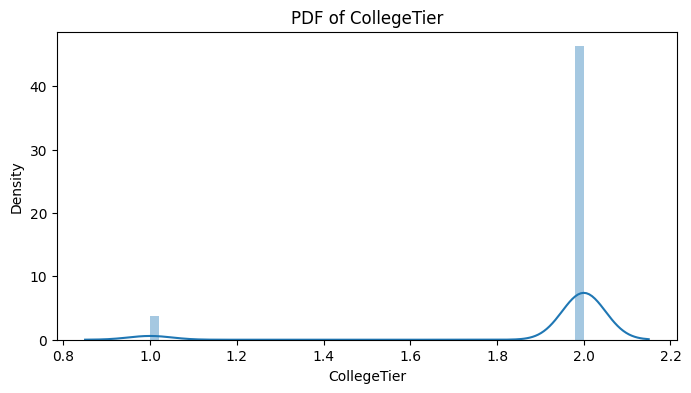

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


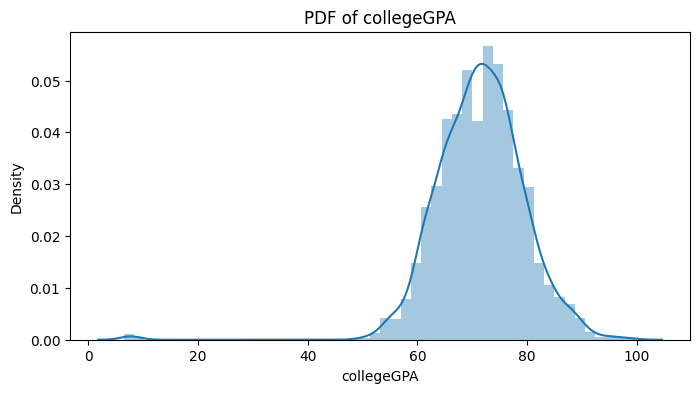

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


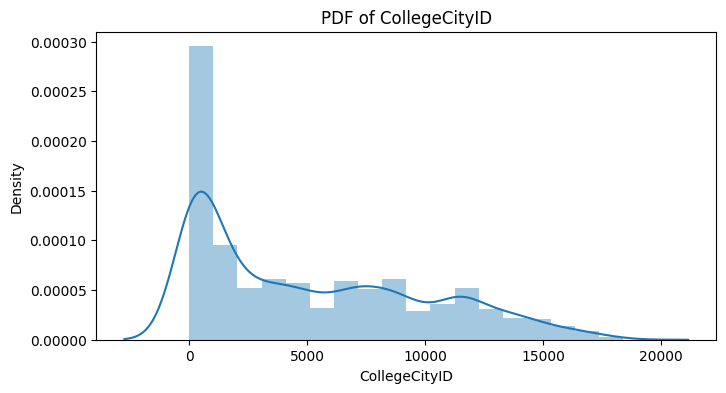

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


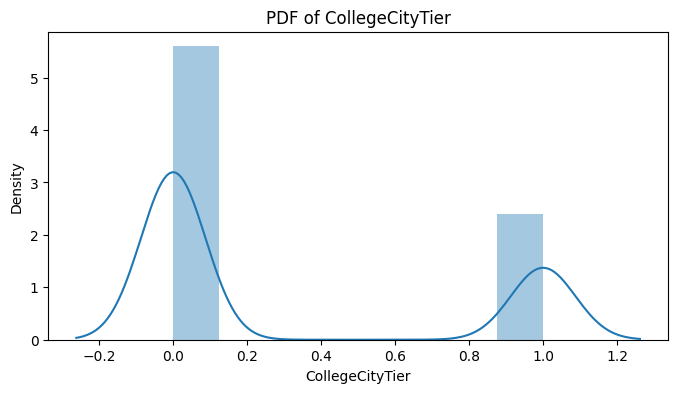

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


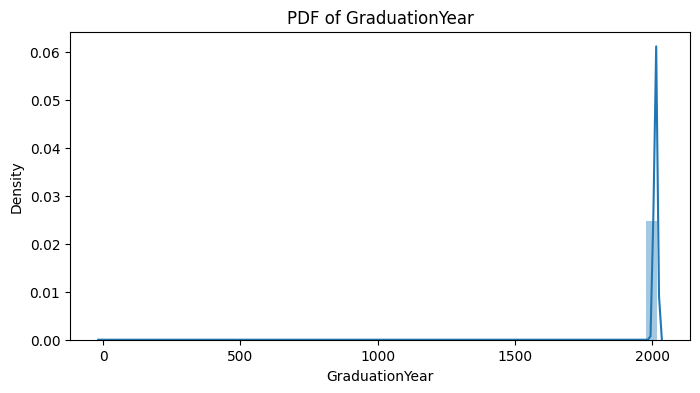

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


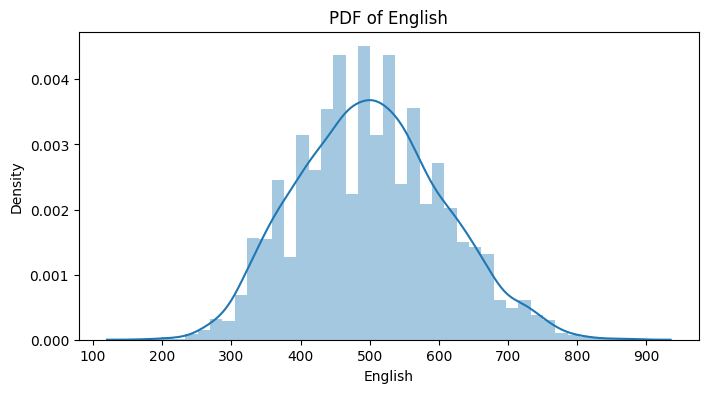

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


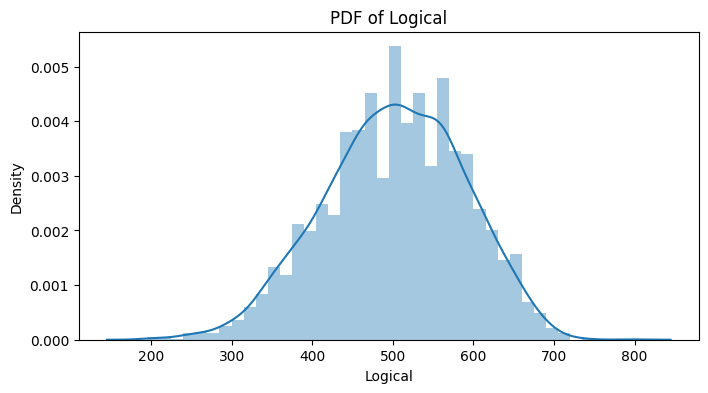

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


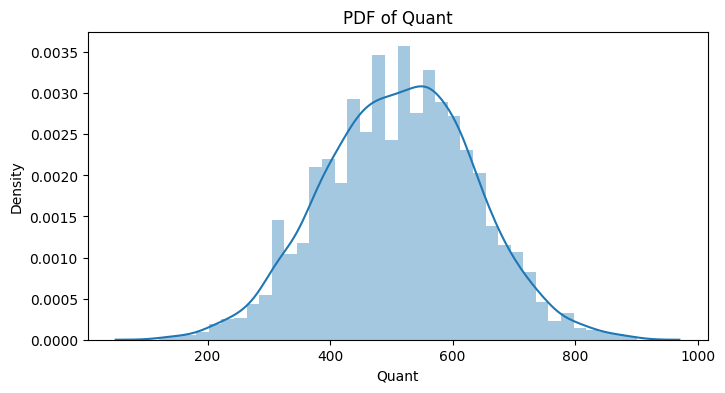

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


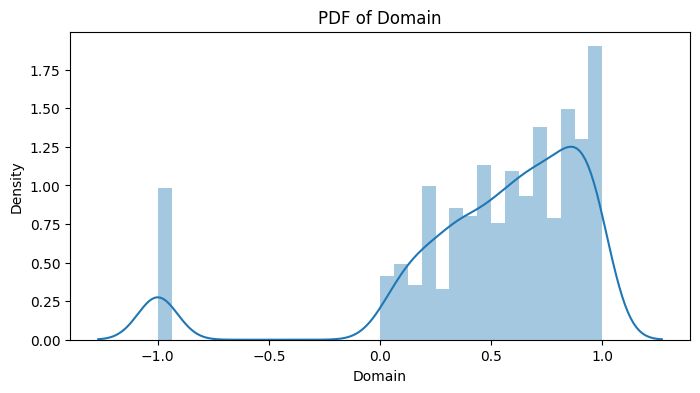

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


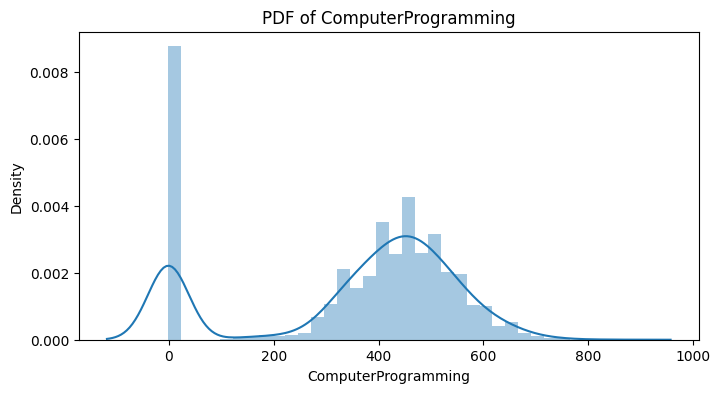

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


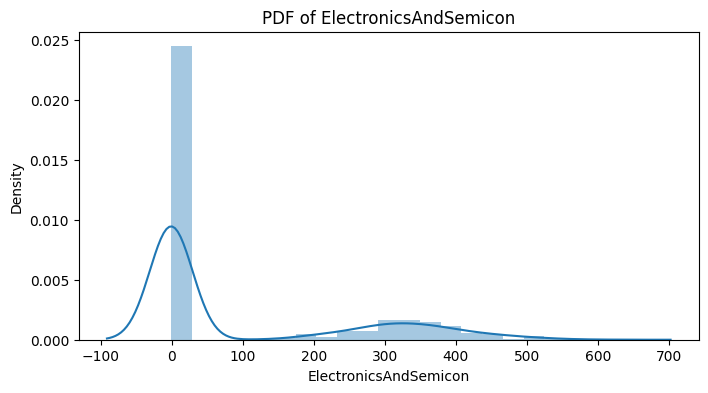

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


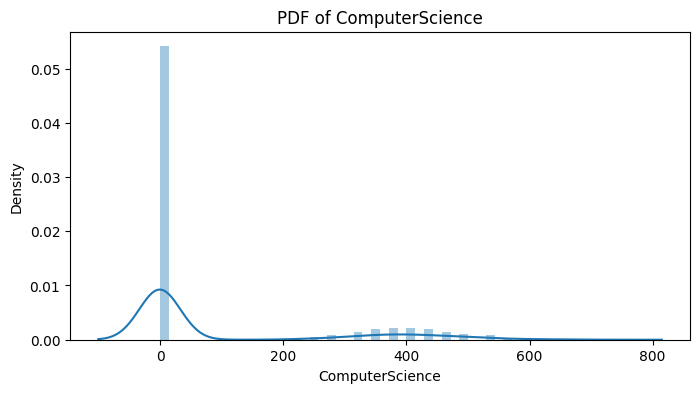

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


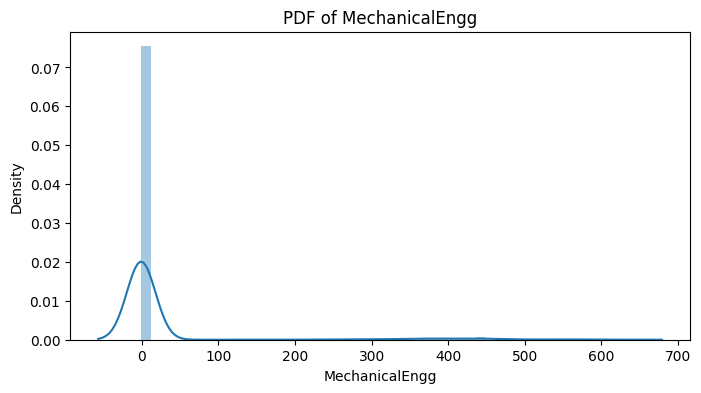

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


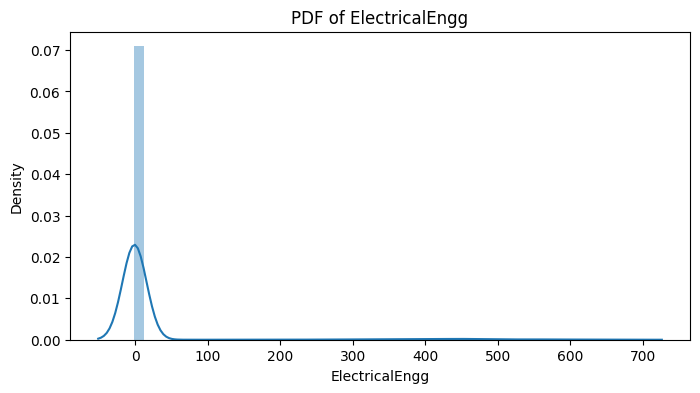

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


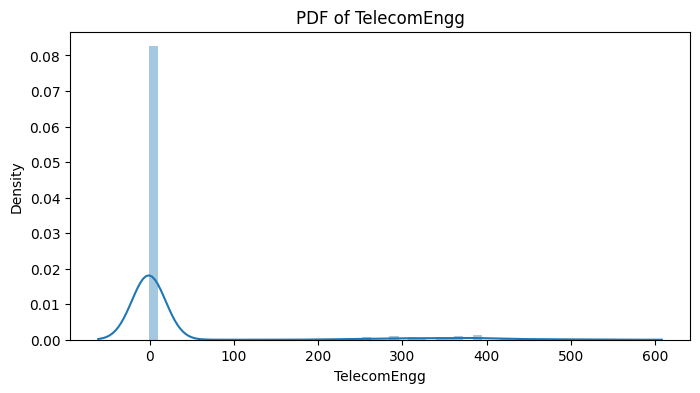

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


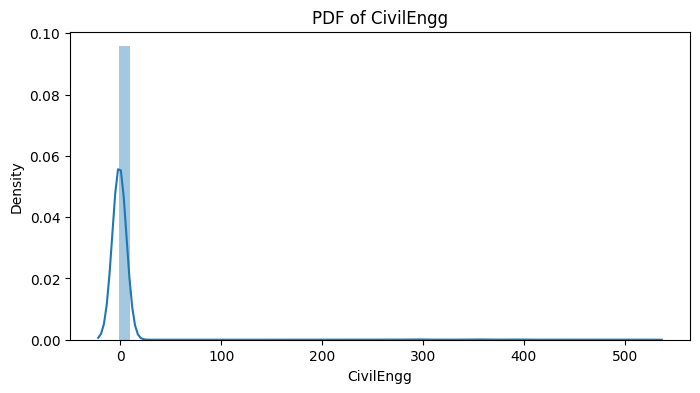

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


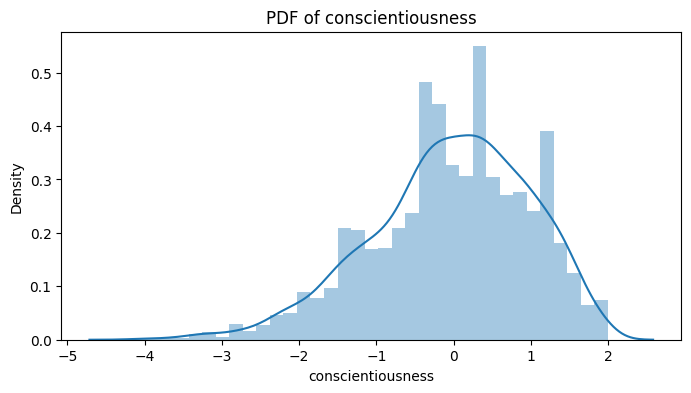

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


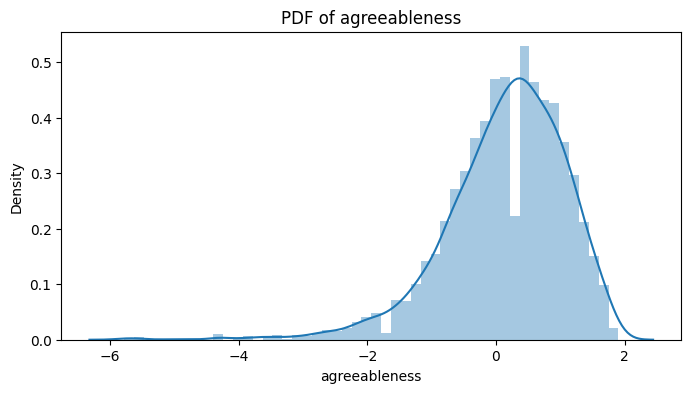

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


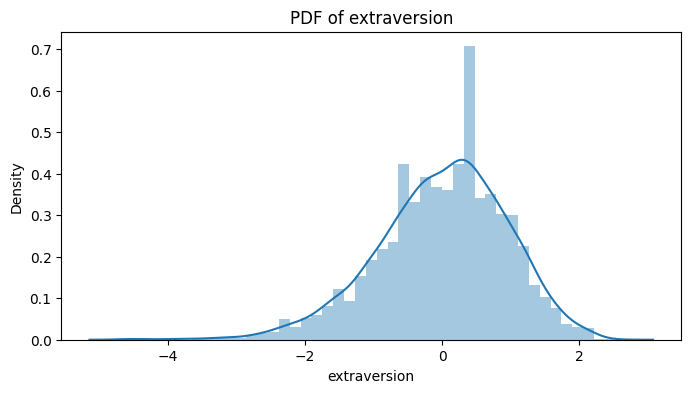

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


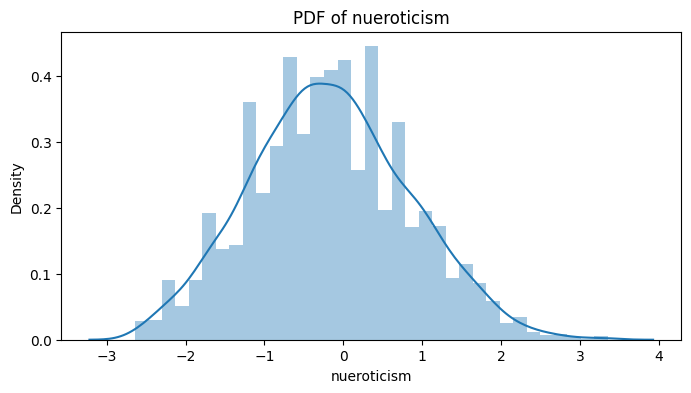

<ipython-input-26-06d3a20a294e>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True)


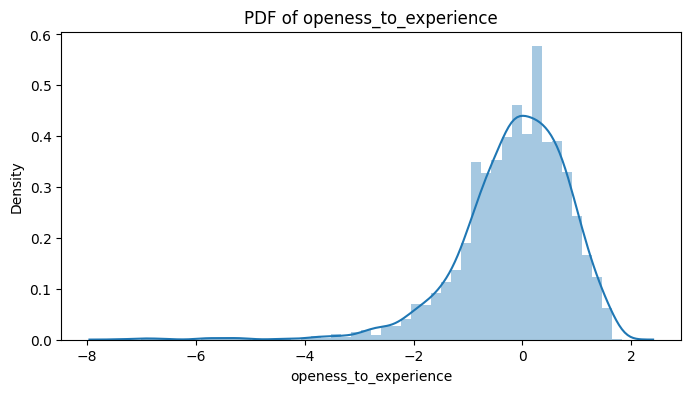

In [26]:
# Histograms for all numerical columns
df.hist(bins=20, figsize=(15,10))
plt.show()

# Boxplots for numerical columns to detect outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.show()

# Probability Distribution Function (PDF) for numerical columns
for column in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8,4))
    sns.distplot(df[column], kde=True)
    plt.title(f'PDF of {column}')
    plt.show()


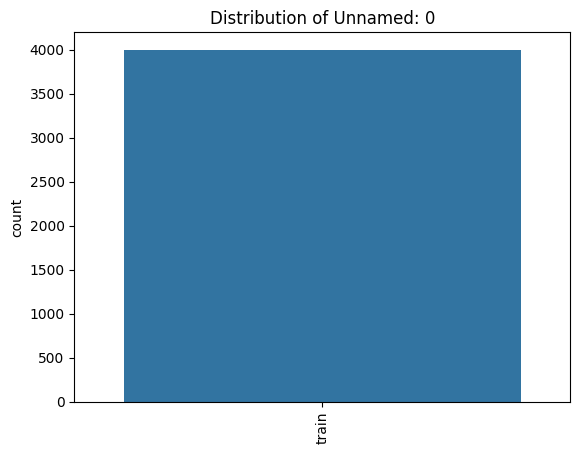

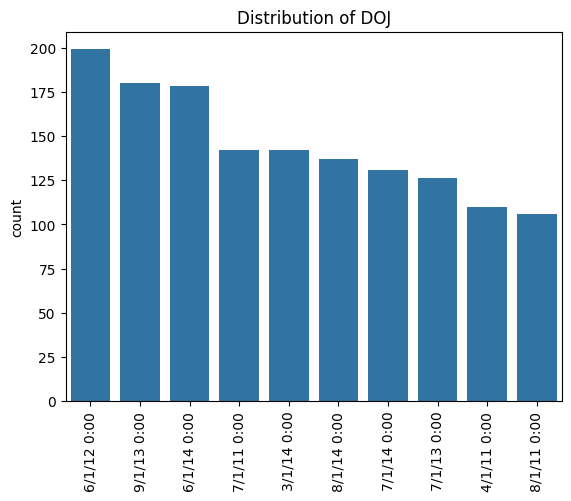

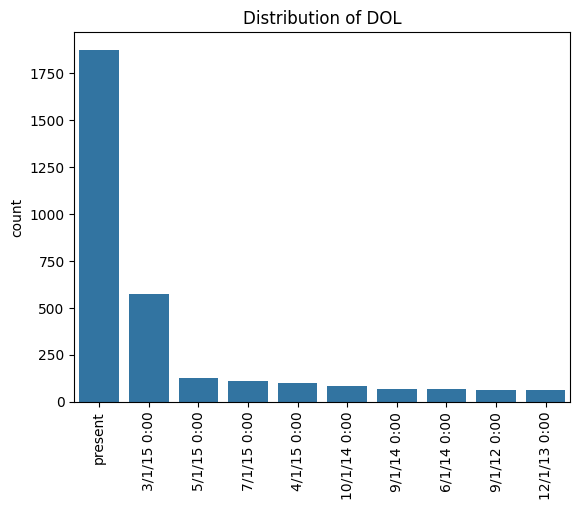

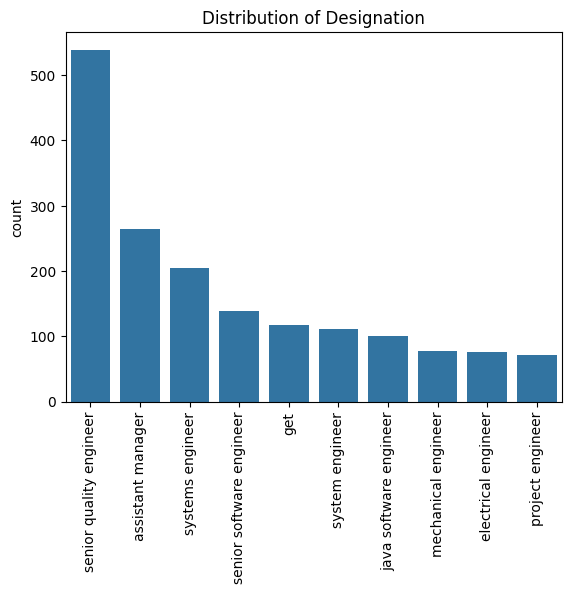

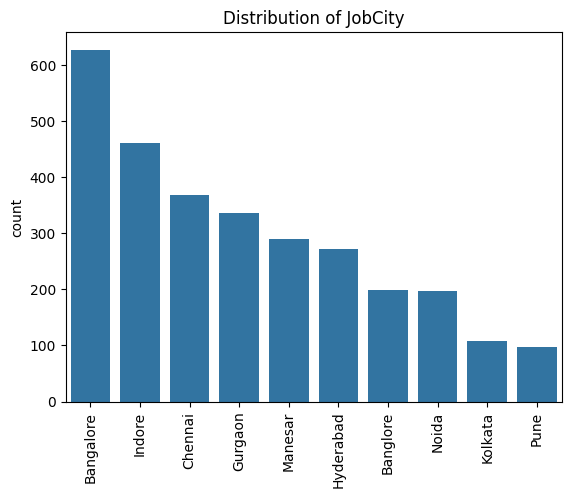

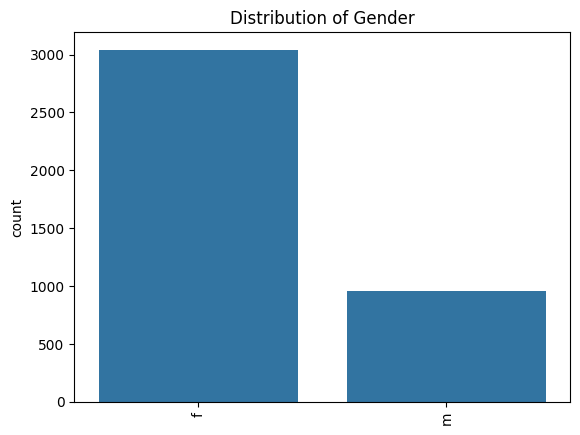

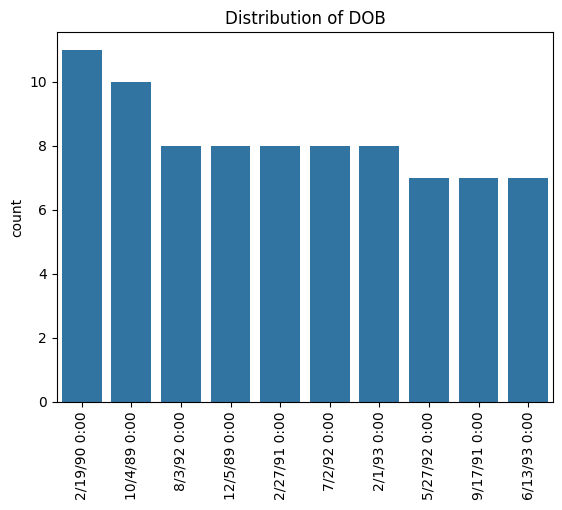

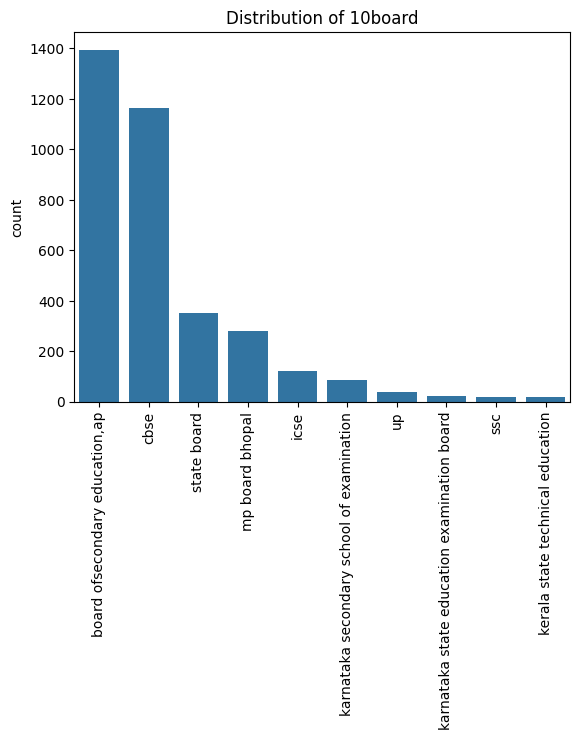

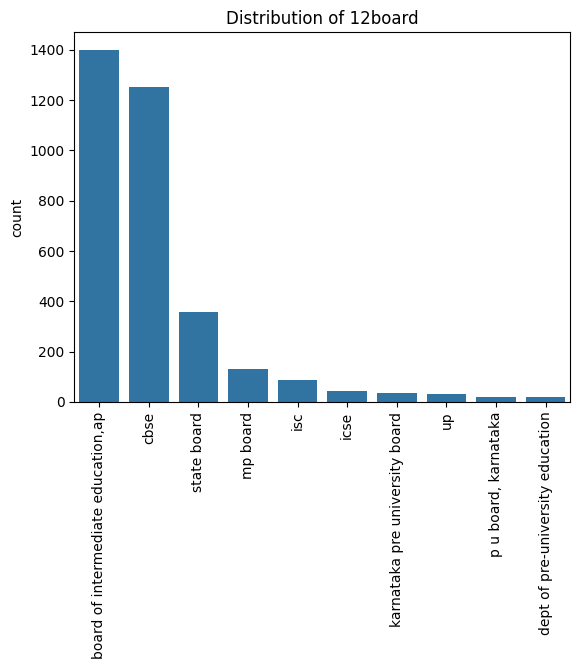

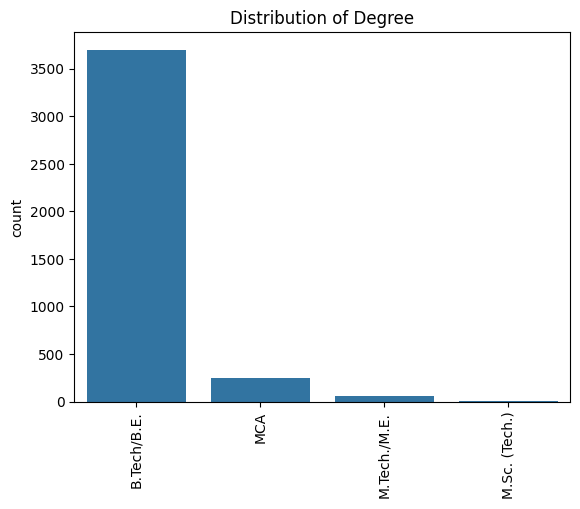

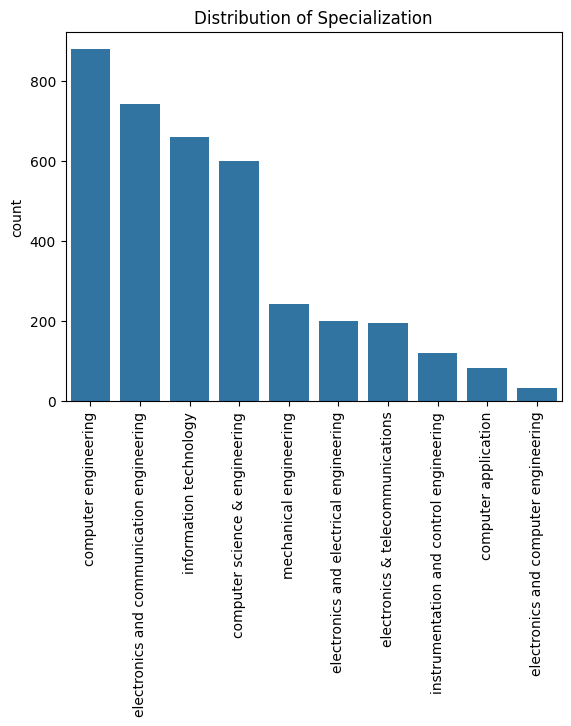

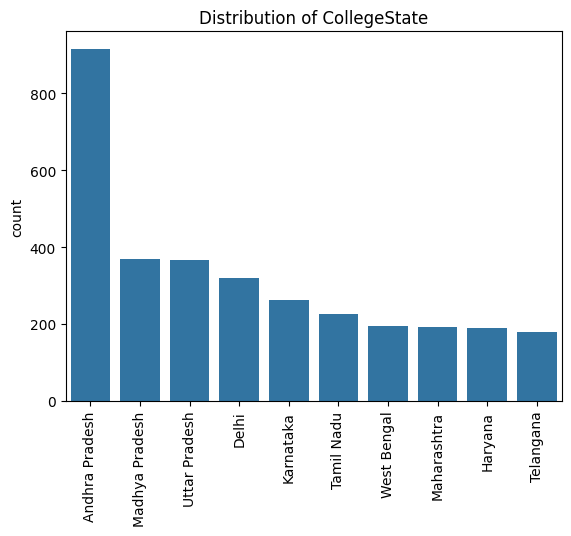

In [27]:
for i in df.columns:
  if df[i].dtype=="object":
    sns.barplot(x=df[i].unique()[:10],y=df[i].value_counts()[:10])
    plt.title("Distribution of {}".format(i))
    plt.xticks(rotation=90)
    plt.show()

**Bivariate Analysis**

In [31]:
g=df.groupby("Specialization")[["collegeGPA"]].mean().sort_values(by="collegeGPA",ascending=False)
g

,collegeGPA
Specialization,
embedded systems technology,88.000000
control and instrumentation engineering,82.100000
information science,81.200000
internal combustion engine,80.600000
industrial & management engineering,80.000000
computer science,77.385000
computer and communication engineering,77.260000
power systems and automation,76.000000
other,75.619231


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

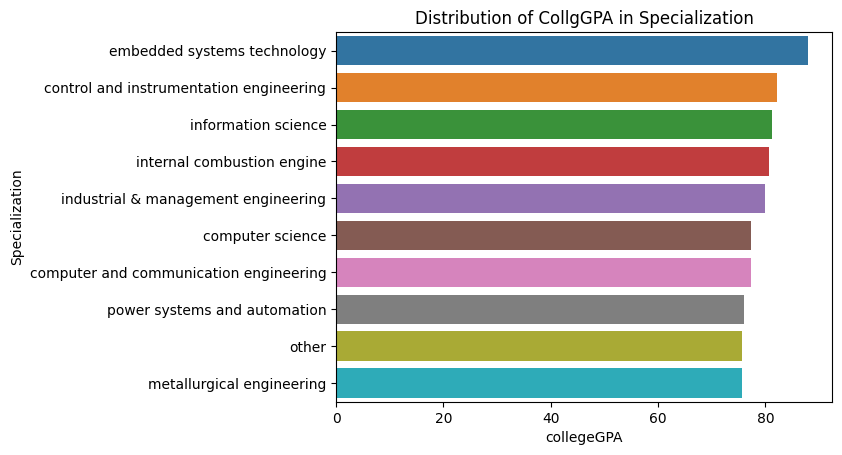

In [33]:
sns.barplot(y=g.index[:10],x=g["collegeGPA"][:10],hue=g.index[:10])
plt.title("Distribution of CollgGPA in Specialization")
plt.show()

In [35]:
 g1=pd.crosstab(index=df["GraduationYear"],columns=df["JobCity"],margins=True,margins_name="Total")
 g1

JobCity,Chennai,Delhi,Mumbai,Pune,ariyalur,bangalore,mumbai,-1,"A-64,sec-64,noida",AM,...,shahibabad,singaruli,sonepat,thane,trivandrum,udaipur,vapi,vizag,vsakhapttnam,Total
GraduationYear,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2009,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,24
2010,0,0,1,0,1,1,0,16,0,0,...,0,0,1,0,0,0,0,0,1,292
2011,0,0,0,0,0,0,0,44,0,0,...,0,0,0,1,0,1,0,0,0,507
2012,1,0,0,1,0,0,0,115,0,0,...,0,0,0,0,0,1,0,0,0,847
2013,0,1,1,0,0,0,1,170,0,0,...,1,0,0,0,1,0,0,0,0,1181
2014,0,0,0,0,0,0,0,108,1,1,...,0,0,0,0,1,0,1,1,0,1036
2015,0,0,0,0,0,0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,94


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


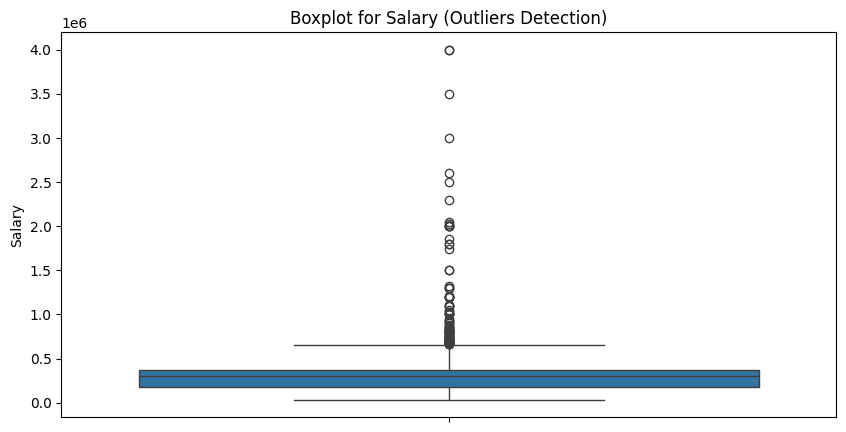

Outliers for Salary:
3       1100000.0
76       800000.0
92      1500000.0
123     1200000.0
128      675000.0
          ...    
3823     775000.0
3904     850000.0
3912     730000.0
3961     700000.0
3992     800000.0
Name: Salary, Length: 109, dtype: float64
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


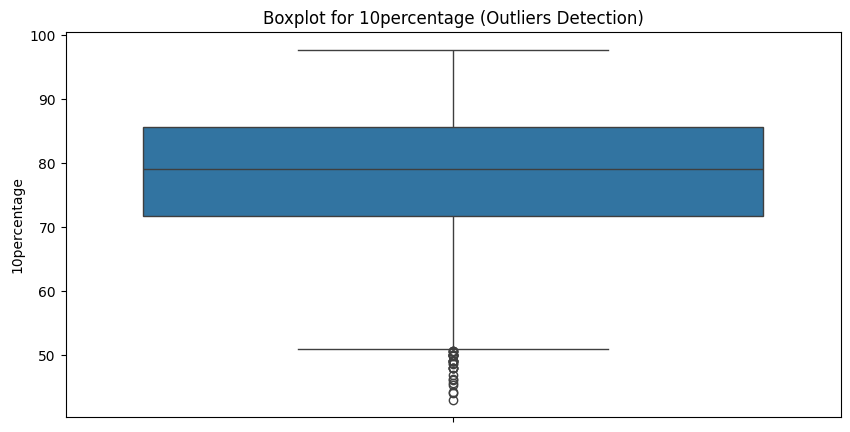

Outliers for 10percentage:
245     50.60
466     44.16
490     44.00
491     45.60
502     48.00
600     49.00
613     48.00
898     49.00
919     48.80
1064    49.00
1102    49.00
1169    48.50
1193    48.00
1235    50.60
1334    43.00
1838    50.00
1845    49.00
1955    45.33
1976    46.24
2037    48.00
2215    50.50
2292    50.00
2432    50.00
2655    50.66
2885    46.80
2982    50.00
3284    50.00
3425    50.00
3690    46.00
3743    49.90
Name: 10percentage, dtype: float64
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


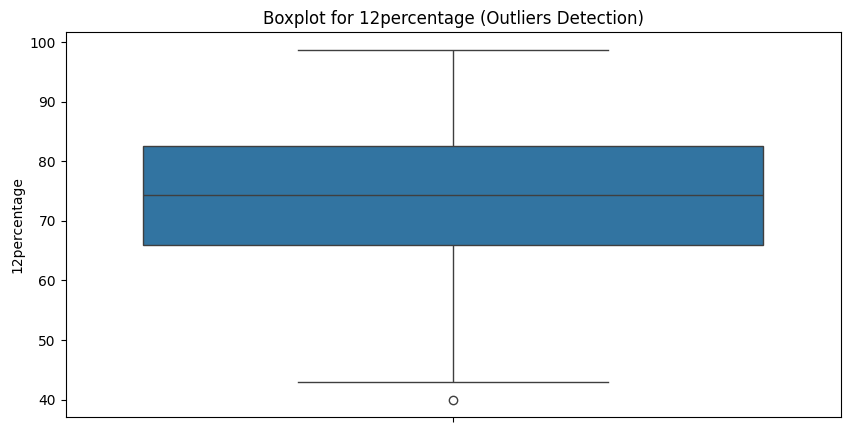

Outliers for 12percentage:
3337    40.0
Name: 12percentage, dtype: float64
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


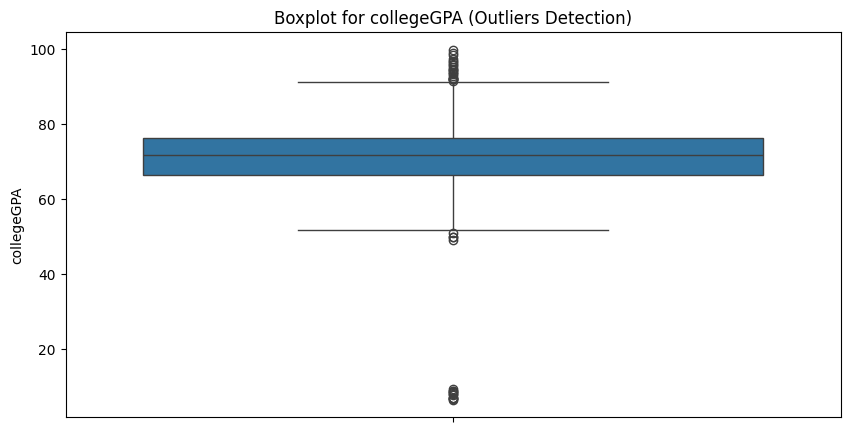

Outliers for collegeGPA:
7        8.58
44      92.10
138      6.63
187     93.00
477     92.00
614     93.60
690     99.93
788      6.80
874     94.50
907     50.00
1029    92.30
1134    96.00
1264    97.30
1345    93.30
1419     6.85
1439     8.07
1510    96.70
1685    94.70
1767     7.56
2151     6.95
2152    95.30
2229     8.13
2293     9.30
2463    92.00
2662     8.88
2691     8.89
2703    94.00
2836    49.07
2880    92.00
2988    94.60
3151    98.40
3276    95.70
3293    51.00
3308     6.45
3323    96.90
3448    50.00
3833    91.60
3850    99.00
Name: collegeGPA, dtype: float64
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


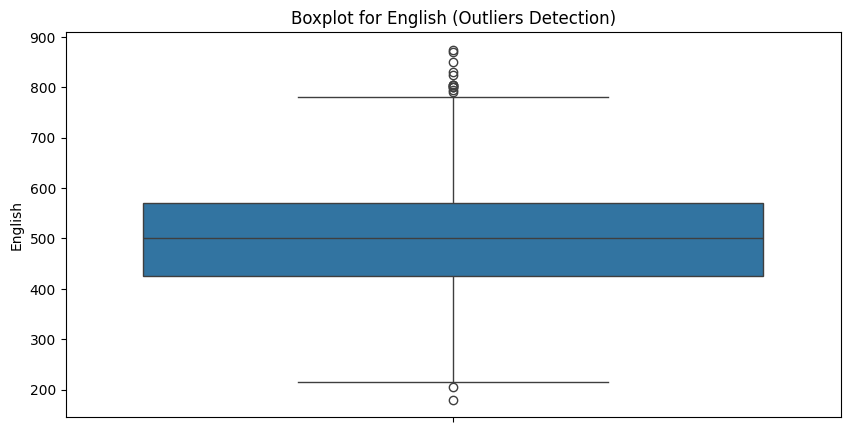

Outliers for English:
275     875
444     825
668     870
839     790
847     800
935     205
1183    805
1217    180
1450    830
1519    795
2077    800
2122    800
2385    805
2596    805
3044    850
Name: English, dtype: int64
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


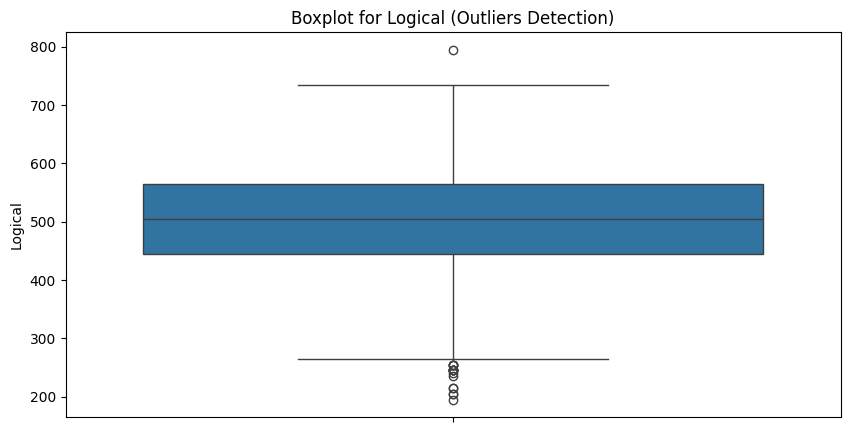

Outliers for Logical:
101     255
133     205
207     245
345     215
628     215
1014    795
1160    255
1439    245
2141    255
2265    255
2796    240
2830    195
2891    245
3119    245
3159    245
3784    205
3876    235
3953    245
Name: Logical, dtype: int64
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


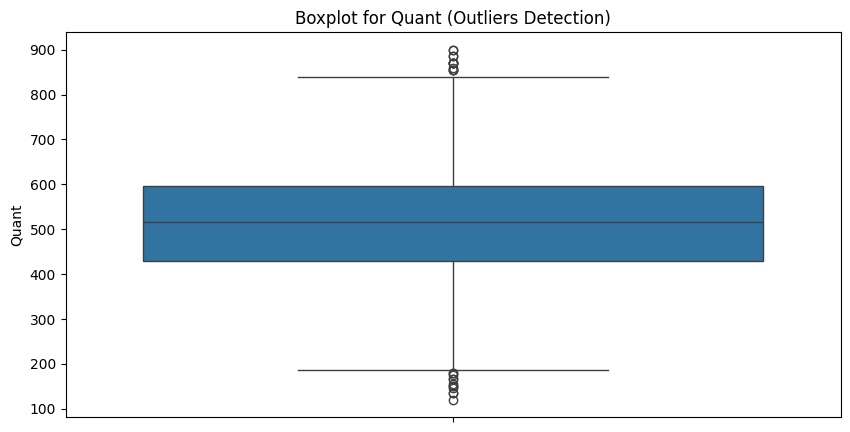

Outliers for Quant:
195     870
522     165
564     180
698     860
783     180
899     870
1148    175
1310    870
1661    870
1815    135
2007    855
2134    145
2155    870
2411    885
2437    120
2490    900
2616    135
2932    165
2957    900
2988    885
3165    855
3239    855
3258    150
3283    150
3616    155
Name: Quant, dtype: int64
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


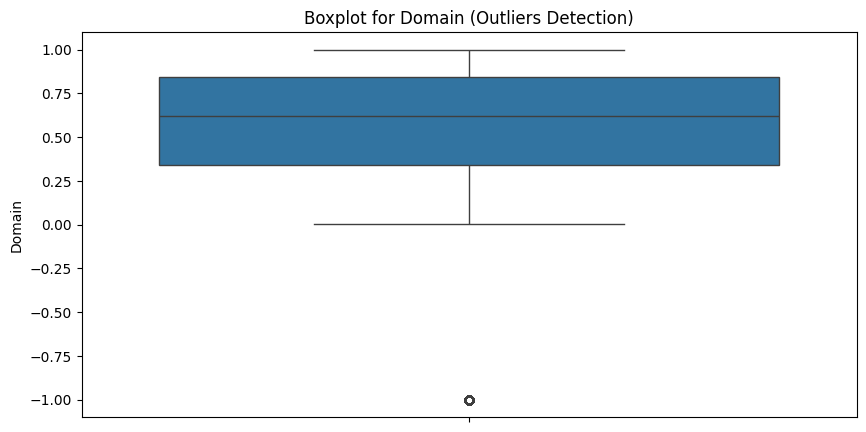

Outliers for Domain:
5      -1.0
14     -1.0
16     -1.0
22     -1.0
35     -1.0
       ... 
3942   -1.0
3958   -1.0
3960   -1.0
3969   -1.0
3978   -1.0
Name: Domain, Length: 246, dtype: float64
--------------------------------------------------


In [39]:
numerical_cols = ['Salary', '10percentage', '12percentage', 'collegeGPA','English', 'Logical', 'Quant', 'Domain']
for col in numerical_cols:
  plt.figure(figsize=(10, 5))
  sns.boxplot(data=df, y=col)
  plt.title(f'Boxplot for {col} (Outliers Detection)')
  plt.show()
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
# Define the bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
# Find the outliers
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
# Print the outliers for this column
  print(f'Outliers for {col}:')
  print(outliers)
  print('-' * 50)

In [36]:
g2=df.groupby("Designation")[["Salary"]].mean()
g2

,Salary
Designation,
.net developer,223382.352941
.net web developer,196250.000000
account executive,287500.000000
account manager,350000.000000
admin assistant,102500.000000
...,...
web designer and seo,200000.000000
web developer,168981.481481
web intern,205000.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

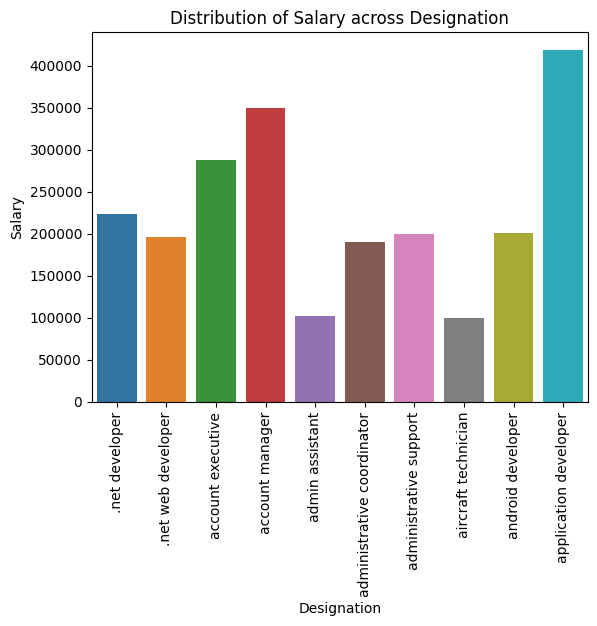

In [37]:
sns.barplot(x=g2.index[:10],y=g2["Salary"][:10],hue=g2.index[:10])
plt.xticks(rotation=90)
plt.title("Distribution of Salary across Designation")
plt.show()

In [40]:
g3=df.pivot_table(columns="CollegeTier",index="Specialization",values="Salary",aggfunc="mean")
g3.head()

CollegeTier,1,2
Specialization,,
aeronautical engineering,NaN,148333.333333
applied electronics and instrumentation,NaN,348333.333333
automobile/automotive engineering,NaN,222000.000000
biomedical engineering,435000.0,145000.000000
biotechnology,382500.0,234615.384615


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

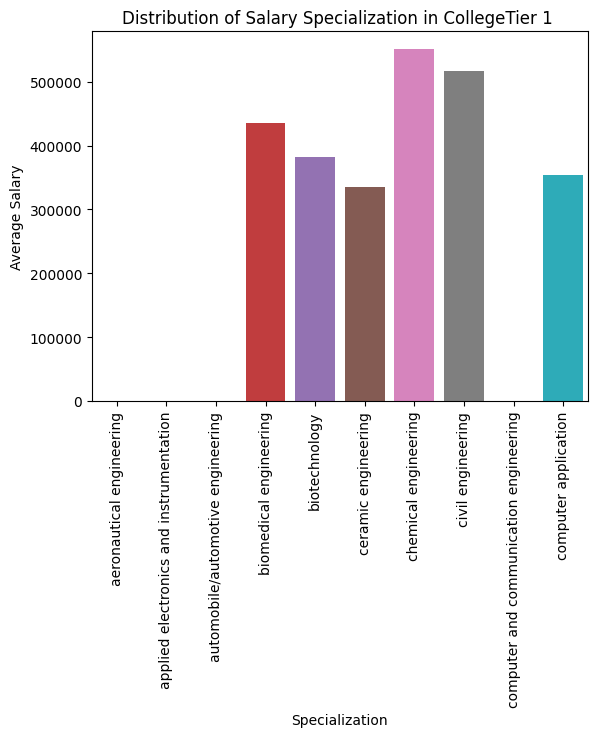

In [43]:
sns.barplot(x=g3.index[:10],y=g3[1][:10],hue=g3.index[:10])
plt.xlabel("Specialization")
plt.ylabel("Average Salary")
plt.title("Distribution of Salary Specialization in CollegeTier 1 ")
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

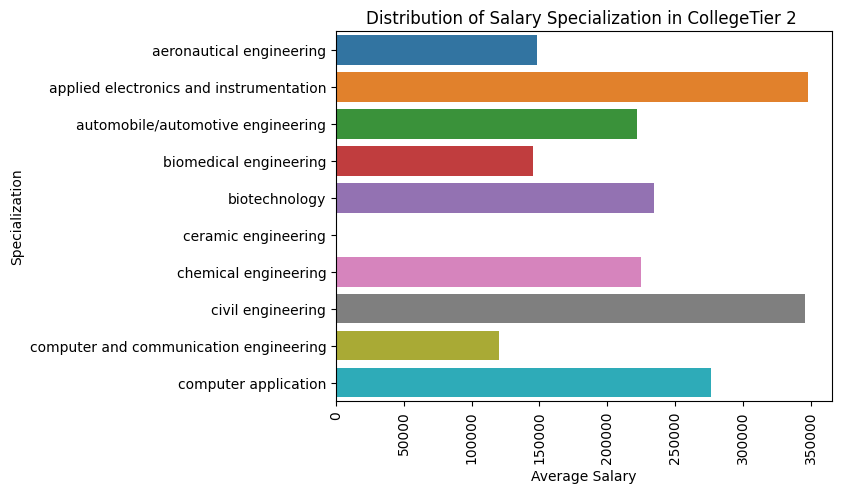

In [44]:
sns.barplot(y=g3.index[:10],x=g3[2][:10],hue=g3.index[:10])
plt.ylabel("Specialization")
plt.xlabel("Average Salary")
plt.title("Distribution of Salary Specialization in CollegeTier 2 ")
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


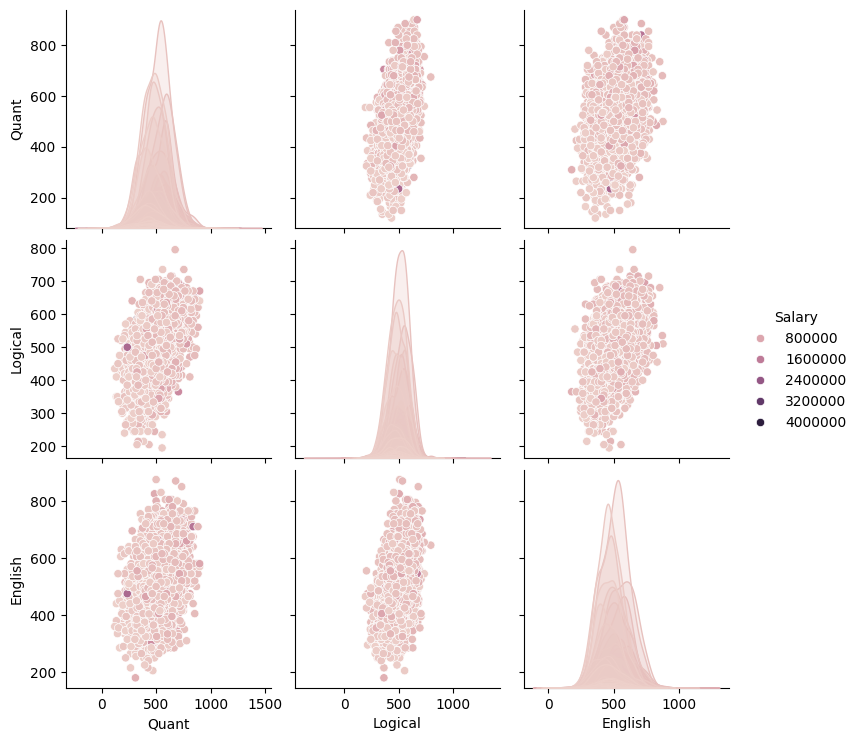

In [45]:
sns.pairplot(df, vars=['Quant', 'Logical', 'English'], hue='Salary')
plt.show()

In [46]:
df[['ComputerScience', 'ElectronicsAndSemicon', 'MechanicalEngg', 'Salary']].corr()

,ComputerScience,ElectronicsAndSemicon,MechanicalEngg,Salary
ComputerScience,1.000000,-0.273707,-0.124355,-0.100720
ElectronicsAndSemicon,-0.273707,1.000000,-0.109434,0.000665
MechanicalEngg,-0.124355,-0.109434,1.000000,0.018475
Salary,-0.100720,0.000665,0.018475,1.000000


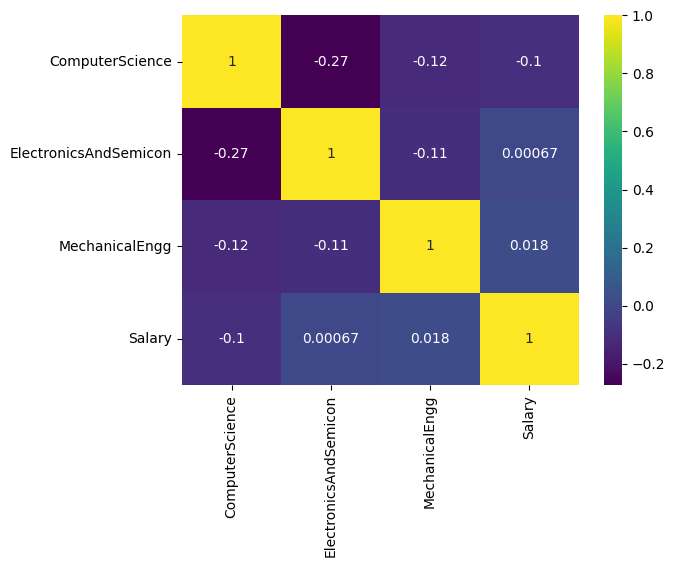

In [48]:
sns.heatmap(df[['ComputerScience', 'ElectronicsAndSemicon', 'MechanicalEngg','Salary']].corr(),annot=True,cmap="viridis")
plt.show()

In [49]:
grouped_df=df.groupby(['Gender', 'Specialization'])[['collegeGPA', 'Salary']].mean()
grouped_df

collegeGPA         Salary
Gender Specialization                                                    
f      aeronautical engineering                  77.000000  180000.000000
       applied electronics and instrumentation   78.750000  287500.000000
       biomedical engineering                    64.650000  290000.000000
       biotechnology                             72.941111  247222.222222
       chemical engineering                      55.600000  100000.000000
...                                                    ...            ...
m      metallurgical engineering                 75.550000  337500.000000
       other                                     75.619231  266538.461538
       polymer technology                        72.790000  700000.000000
       power systems and automation              76.000000  100000.000000
       telecommunication engineering             77.476000  351000.000000

[71 rows x 2 columns]

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


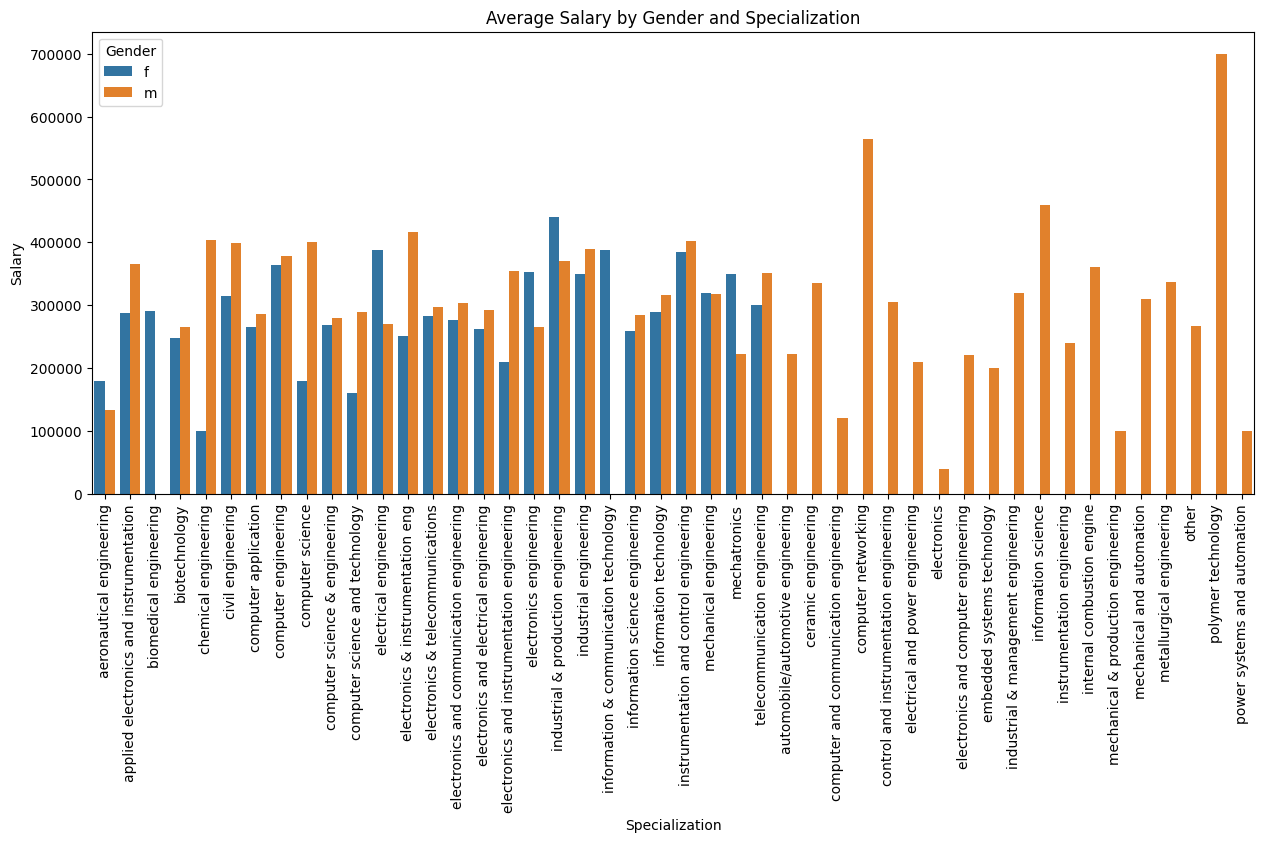

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


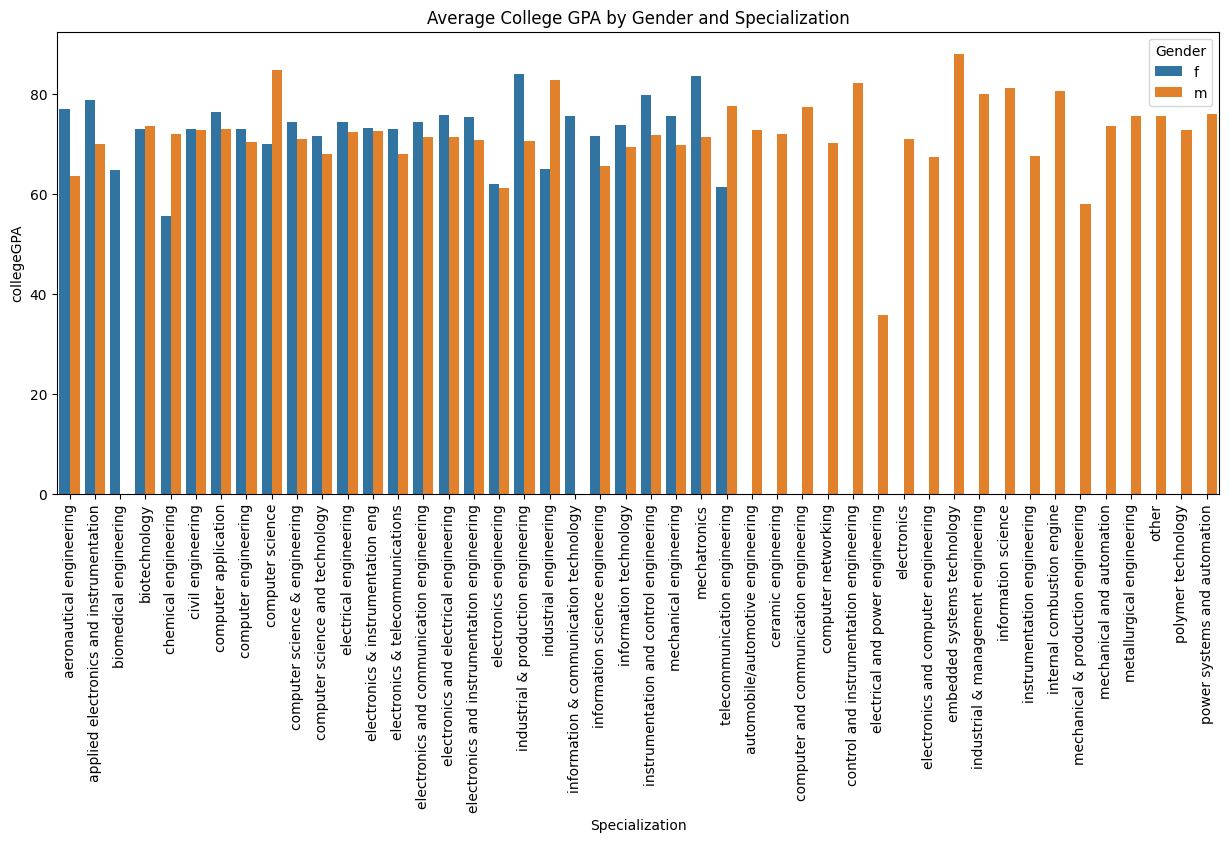

In [50]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Specialization', y='Salary', hue='Gender', data=grouped_df)
plt.xticks(rotation=90) # Rotate x-axis labels for readability
plt.title('Average Salary by Gender and Specialization')
plt.show()
# Create a bar plot for collegeGPA
plt.figure(figsize=(15, 6))
sns.barplot(x='Specialization', y='collegeGPA', hue='Gender', data=grouped_df)
plt.xticks(rotation=90)
plt.title('Average College GPA by Gender and Specialization')
plt.show()